# Detection de faux billets avec Python

# SOMMAIRE

ETAPE 1 : IMPORTATION DES LIBRAIRIES

ETAPE 2 : NETTOYAGE DES DONNEES

ETAPE 3 : ANALYSE EXPLORATOIRE

ETAPE 4 : ANALYSE DESCRIPTIVE

ETAPE 5 : REGRESSION LOGISITQUE

ETAPE 6 : K-MEANS

ETAPE 7: REGRESSION LINEAIRE

ETAPE 8 : CONCLUSION

ETAPE 9 : ETAPE PRODUCTION


## ETAPE 1 : IMPORTATION DES LIBRAIRIES<a id='1'></a>


In [ ]:
#Importation des libraires
import pandas as pd
import numpy as np
import seaborn as sns
from tables.table import Column
from scipy import stats as st
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.decomposition import PCA
from sklearn import decomposition
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from mpl_toolkits.mplot3d import Axes3D


#Paramétrage de l'affichage des nombres décimaux
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
#Accès au google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importation du fichier billets.csv
billets_csv ='/content/drive/MyDrive/Herbet_Thomas_P10/billets.csv'
billets = pd.read_csv(billets_csv, sep=';')

## ETAPE 2 : NETTOYAGE DES DONNEES


In [ ]:
#Affichage des dimensions du dataset
print('Il y a :', billets.shape[0], 'lignes')

Il y a : 1500 lignes


In [ ]:
#Consultation du nombre de colonnes
print('Il y a :', billets.shape[1], 'colonnes.')

Il y a : 7 colonnes.


In [ ]:
#Affichage de la nature des données dans chacune des colonnes
print(f"La nature des données est : {(billets.dtypes)}")

La nature des données est : is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object


In [ ]:
#Recherche de valeurs manquantes
billets.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [ ]:
#Recherche des doublons
billets.duplicated().sum()

0

In [ ]:
#Affichage du dataframe
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [ ]:
#Division des données en ensembles d'entraînement et de test
train_data = billets.dropna()  #Suppression des lignes avec des valeurs manquantes
X_train = train_data.drop('margin_low', axis=1)
y_train = train_data['margin_low']

#Séparation des données avec des valeurs manquantes pour la prédiction
test_data = billets[billets['margin_low'].isnull()]
X_test = test_data.drop('margin_low', axis=1)

#Création d'un modèle de régression linéaire
model = LinearRegression()

#Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

#Prédiction des valeurs manquantes dans la colonne 'margin_low'
predicted_values = model.predict(X_test)

#Remplacement des valeurs manquantes par les valeurs prédites dans le DataFrame d'origine
billets.loc[billets['margin_low'].isnull(), 'margin_low'] = predicted_values

#Affichage du DataFrame
print(billets)


      is_genuine  diagonal  height_left  height_right  margin_low  margin_up  \
0           True    171.81       104.86        104.95        4.52       2.89   
1           True    171.46       103.36        103.66        3.77       2.99   
2           True    172.69       104.48        103.50        4.40       2.94   
3           True    171.36       103.91        103.94        3.62       3.01   
4           True    171.73       104.28        103.46        4.04       3.48   
...          ...       ...          ...           ...         ...        ...   
1495       False    171.75       104.38        104.17        4.42       3.09   
1496       False    172.19       104.63        104.44        5.27       3.37   
1497       False    171.80       104.01        104.12        5.51       3.36   
1498       False    172.06       104.28        104.06        5.17       3.46   
1499       False    171.47       104.15        103.82        4.63       3.37   

      length  
0     112.83  
1     113

In [ ]:
#Vérification des données manquantes
billets.isnull().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Calcul du R2, MSE, RMSE, MAE pour évaluer la performance de la régréssion linéaire

In [ ]:
# Sépare les données d'entraînement et de test
y = billets['margin_low']
X = billets.drop(columns=['is_genuine', 'margin_low'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
# Effectue la régression
lr = LinearRegression()
lr = lr.fit(X_train, y_train)

In [ ]:
from sklearn import metrics
# Effectue la prédiction sur les données test
y_pred = lr.predict(X_test)

# Calcule et affiche les métriques
lr_metrics = ['r2', 'mse', 'rmse', 'mae']


# Calcule les métriques
r2 = lr.score(X_train, y_train)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred, squared=False)
mae = metrics.mean_absolute_error(y_test, y_pred)

# Stocke les métriques dans une liste
lr_metrics_values = []
lr_metrics_values.extend([r2, mse, rmse, mae])

# Affiche les métriques
lr_metrics = ['r2', 'mse', 'rmse', 'mae']

for lr_metric, lr_metric_value in zip(lr_metrics, lr_metrics_values):
    print(f'{lr_metric.upper()} : \t{lr_metric_value:.6f}')

del lr_metrics, lr_metrics_values, mse, rmse, mae, lr_metric, lr_metric_value

R2 : 	0.469474
MSE : 	0.222052
RMSE : 	0.471223
MAE : 	0.358762


In [ ]:
# Nombre de caractéristiques (ou variables indépendantes)
n = len(y_test)
p = X_test.shape[1]

# Calcul du R2 ajusté
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R2 Score:", adjusted_r2)

Adjusted R2 Score: 0.4640489086611116


In [ ]:
import statsmodels.api as sm
# Calcule les résidus
df = pd.DataFrame(billets)

# Créer le modèle de régression
model = sm.OLS(df['is_genuine'], df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up']])

# Ajuster le modèle
results = model.fit()

# Obtenir les résidus
residuals = results.resid
print(residuals)

0       0.46
1      -0.08
2       0.01
3      -0.01
4       0.34
        ... 
1495   -0.62
1496   -0.11
1497   -0.05
1498   -0.17
1499   -0.39
Length: 1500, dtype: float64


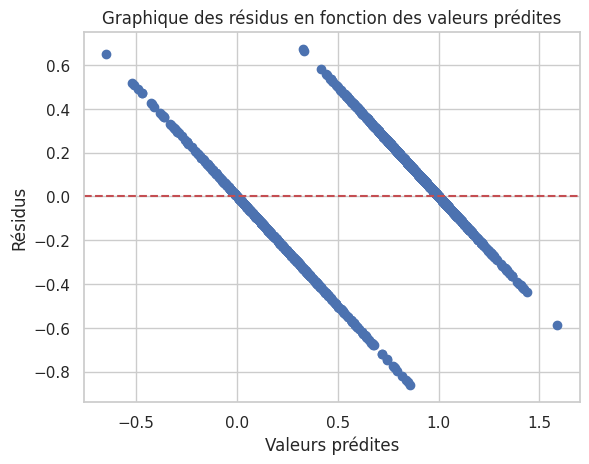

In [ ]:
model = sm.OLS(df['is_genuine'], df[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up']])
results = model.fit()
residuals = results.resid

# Calculer les valeurs prédites
predicted_values = results.fittedvalues

# Créer le graphique des résidus en fonction des valeurs prédites
plt.scatter(predicted_values, residuals)
plt.xlabel('Valeurs prédites')
plt.ylabel('Résidus')
plt.title('Graphique des résidus en fonction des valeurs prédites')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

Réalisation du test statistique de Breush-Pagan dont les hypothèses sont les suivantes :

H0 : l’homoscédasticité est présente si p-value > 5 % ;
H1 : l’homoscédasticité n’est pas présente si p-value < 5 %.

In [ ]:
from scipy.stats import levene
df['residuals'] = df['height_left'] - df['height_right']

# Effectuer le test de Levene pour les résidus
stat, p = levene(df['residuals'][df['is_genuine'] == True], df['residuals'][df['is_genuine'] == False])

# Interpréter les résultats
alpha = 0.05
print("Statistique de test:", stat)
print("p-value:", p)
if p > alpha:
    print("Les variances des résidus sont homoscédastiques (hypothèse nulle non rejetée)")
else:
    print("Les variances des résidus ne sont pas homoscédastiques (hypothèse nulle rejetée)")

del df['residuals']


Statistique de test: 11.96165235953826
p-value: 0.0005582817592040269
Les variances des résidus ne sont pas homoscédastiques (hypothèse nulle rejetée)


L
e test indique que l'homoscédasticité n'est pas présente.

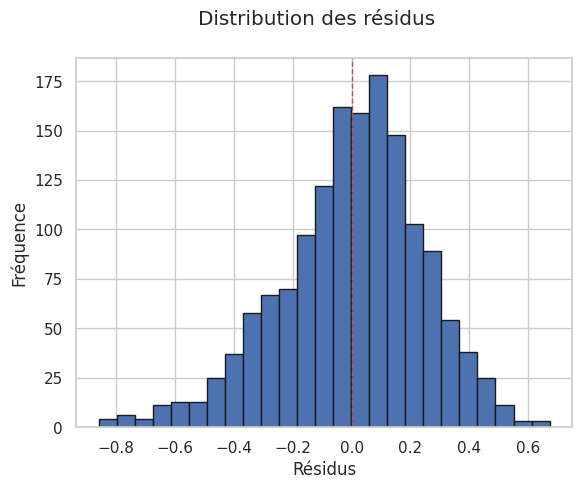

In [ ]:
# Trace le graphique
fig, ax = plt.subplots()

ax.hist(x=residuals, bins=25, edgecolor='k')
ax.axvline(x=0, linestyle='--', linewidth=1, color='r')

ax.set_xlabel('Résidus')
ax.set_ylabel('Fréquence')
fig.suptitle('Distribution des résidus')

plt.show()

del fig, ax,

In [ ]:
# Réalise le test de Shapiro-Wilk
res = st.shapiro(residuals)
print(f'p-value : {res.pvalue:.3e}')

del res

p-value : 1.153e-10


In [ ]:
# Calcule le VIF pour chaque variable explicative considérée dépendante
for column in X_train.columns:
    y_vif = X_train[column]
    X_vif = X_train.drop(columns=column)
    lr_vif = LinearRegression().fit(X_vif, y_vif)
    r2_vif = lr_vif.score(X_vif, y_vif)
    vif = 1 / (1 - r2_vif)
    print(f'{column} : \t{vif:.3f}')

del column, y_vif, X_vif, lr_vif, r2_vif, vif

diagonal : 	1.011
height_left : 	1.166
height_right : 	1.244
margin_up : 	1.421
length : 	1.592


## ETAPE 3 : ANALYSE EXPLORATOIRE

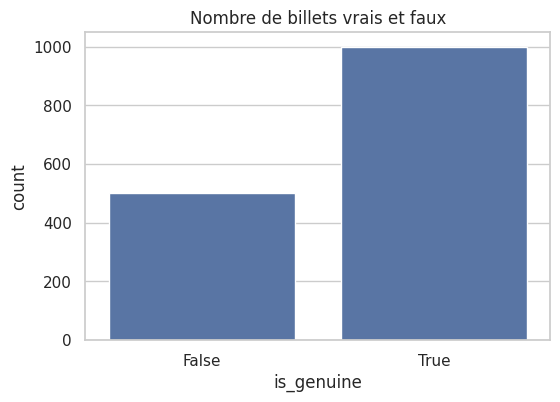

In [ ]:
#Histogramme des vrais et faux billets
plt.figure(figsize=(6,4))
sns.countplot(data=billets, x='is_genuine')
#Titre du graphique
plt.title('Nombre de billets vrais et faux')
#Affichage du graphique
plt.show()

Cet histogramme possède 2 catégories : Vrais(True) et Faux (False).
Il représente l'occurence pour chaque catégorie à travers l'aggréagtion 'count'.
On observe qu'il y a plus de vrai billets que de faux billets. En effet il y a 1000 vrais billets et 500 faux billets.
Donc au total nous avons 1 500 individus avec 67 % de vrais billets et 33 % faux billets.



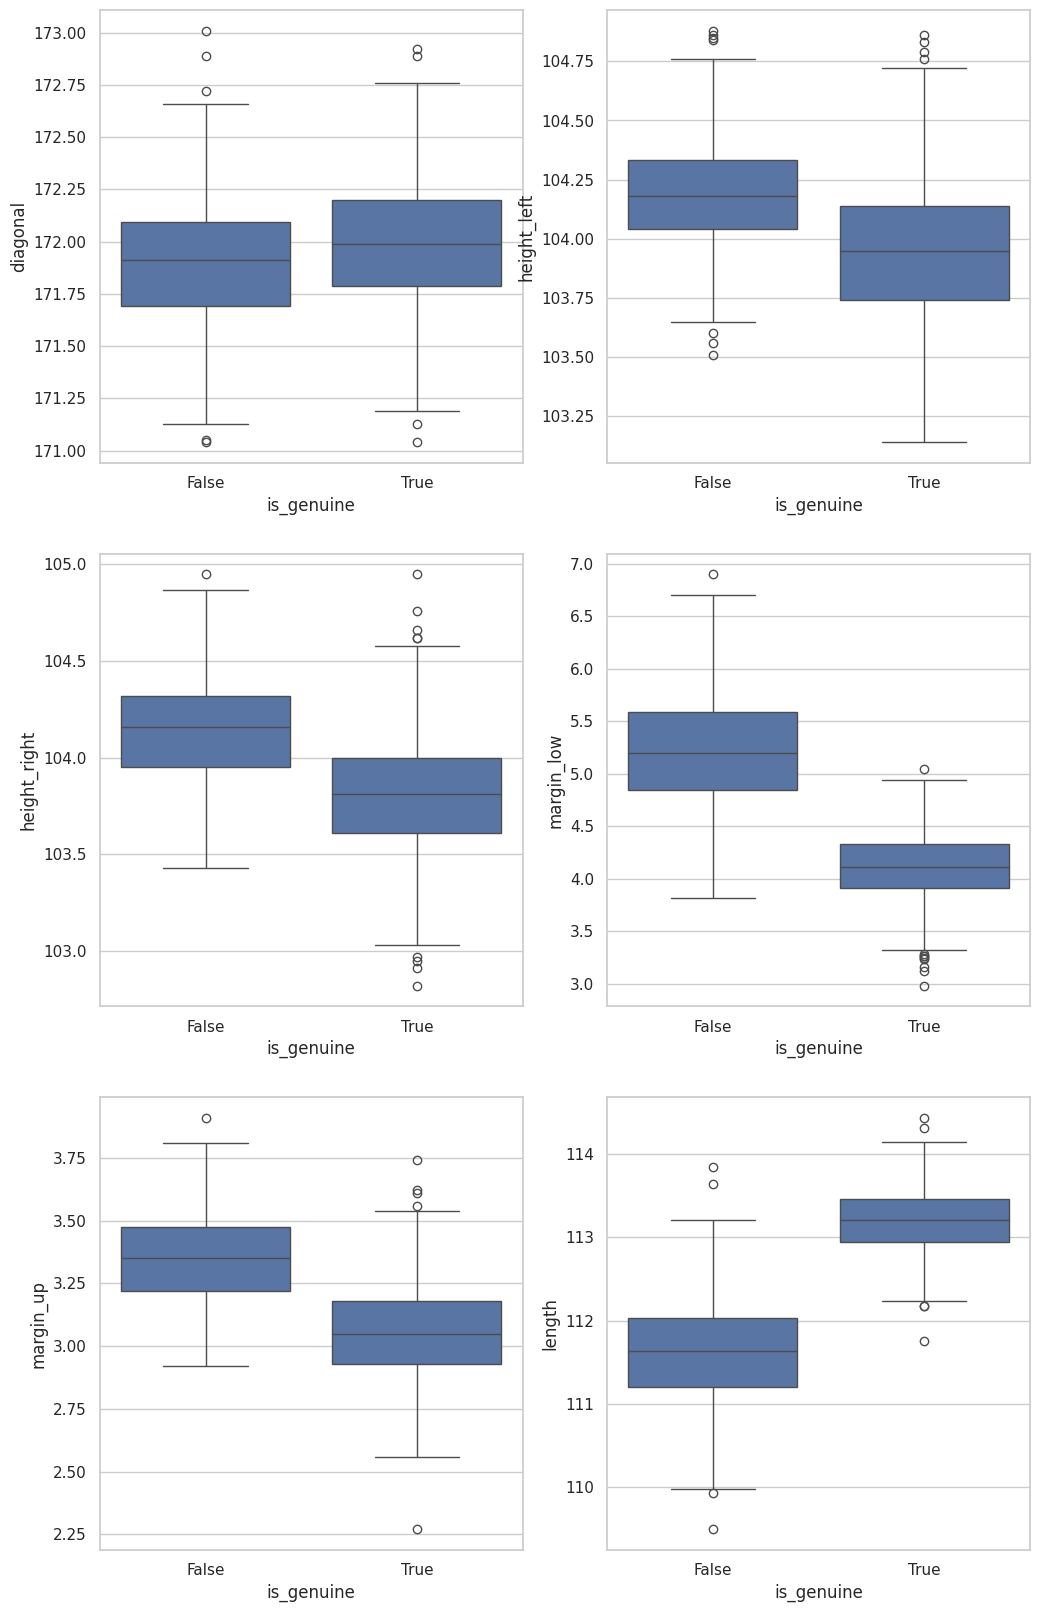

In [ ]:
#Création d'une paire de boxplot
plt.figure(figsize=(12, 20))
sns.set(style="whitegrid")

plt.subplot(321)
sns.boxplot(data=billets, x='is_genuine', y='diagonal')

plt.subplot(322)
sns.boxplot(data=billets, x='is_genuine', y='height_left')

plt.subplot(323)
sns.boxplot(data=billets, x='is_genuine', y='height_right')

plt.subplot(324)
sns.boxplot(data=billets, x='is_genuine', y='margin_low')

plt.subplot(325)
sns.boxplot(data=billets, x='is_genuine', y='margin_up')

plt.subplot(326)
sns.boxplot(data=billets, x='is_genuine', y='length')

plt.show(block=False)

Ces 'boxplots' représente la distribution des données, l'asymétrie des quartiles et des moynnes pour chaque couple de variables.

On constate qu'il y a des couples de variables dont la distribution n'est pas asymétrique comme par exemple length et margin_low. Pour les autres variables les différences sont relativement faibles.

Nous allons donc conserver ces 2 variables pour détecter les faux billets lors de la suite des analyses.

## ETAPE 4 : ANALYSE DESCRIPTIVE

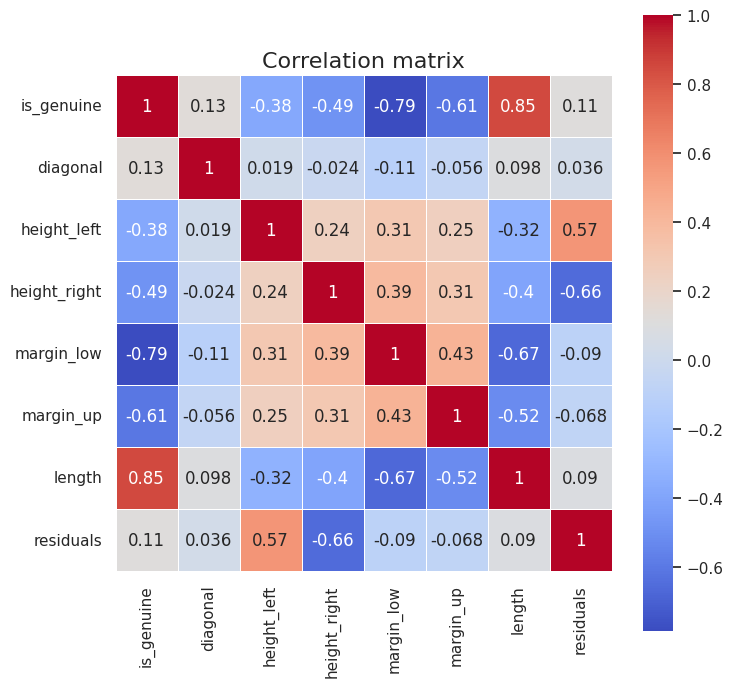

In [ ]:
#Réalisation d'une matrice de corrélation
corrMatrix = billets.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corrMatrix, square=True, annot=True, linewidths=.5, cmap='coolwarm')
#Titre du graphique
plt.title("Correlation matrix", fontsize=16)
#Affichage du graphique
plt.show()

Les valeurs proches de 1 indiquent une forte corrélation positive, signifiant que lorsque la valeur d’une variable augmente, celle de l’autre variable augmente également.

Les valeurs proches de -1 représentent une forte corrélation négative, où l’augmentation d’une variable entraîne la diminution de l’autre.

Des valeurs proches de 0 suggèrent qu’il n’y a pas de corrélation linéaire directe entre les variables.

La matrice montre les relations entre les différentes mesures des billets, telles que la diagonale, la hauteur, les marges et la longueur. On constate une forte corrélation positive entre 'length' et 'is_genuine' que 85% Cela signifie que lenght contribut à 85% pour détecter les vrais billets.

Tandis que 'margin_low' est corrélé négativement à 'is-genuine' de -79%. Ce qui signifie que 'margin_low' contribut à 79% à détecter les faux billets.

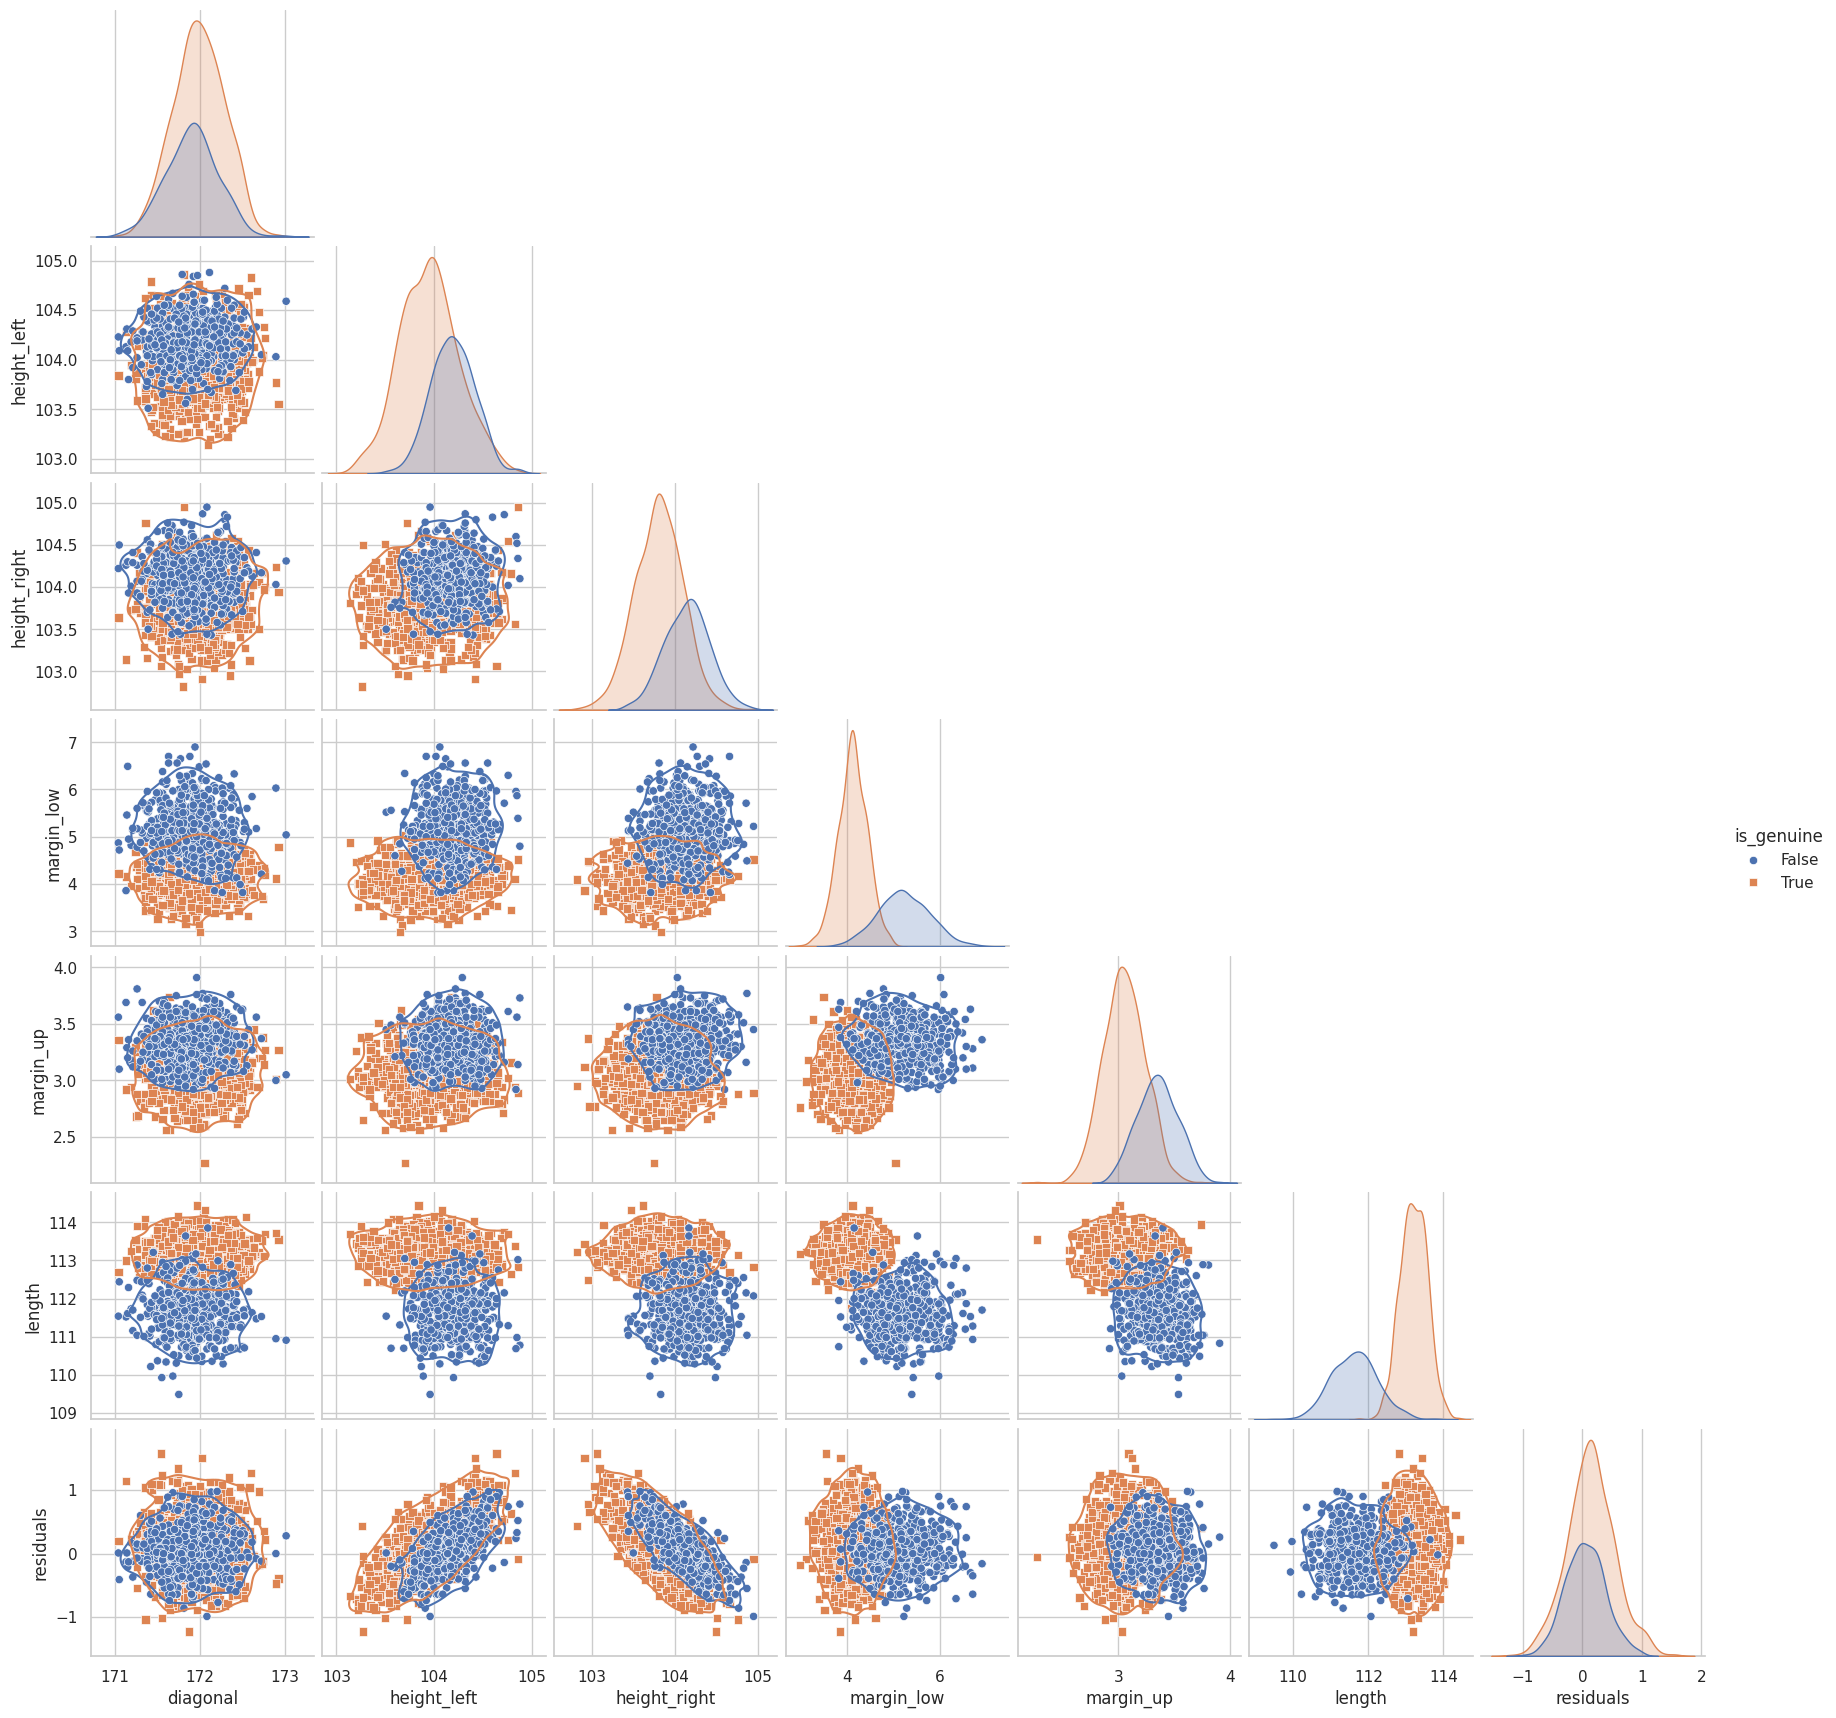

In [ ]:
#Création d'un pairplot
g = sns.pairplot(billets, hue='is_genuine', markers=['o','s'], corner=True)
g.map_lower(sns.kdeplot, levels=2, color='.2')
#Affichage du graphique
plt.show()

 Chaque cellule dans la matrice est un graphique de dispersion qui représente la relation entre deux variables, tandis que les courbes sur la diagonale montrent la distribution de chaque variable individuellement.

 Les points dans les graphiques de dispersion sont colorés en bleu et orange. Le bleu représente “False” les faux billets et l’orange représente “True” les vrais billets.

 En regardant les graphiques de dispersion, nous pouvons observer les relations entre les variables.
 Etant donné que les points sont dispersés, cela indique qu’il n’y a pas de corrélation significative entre ces deux variables.

 Cependant sur le graphique de dispersion ayant 'length' et 'margin_low' en tant que variables, on observe qu'il y a une nette séparation entre les 'vrais' et les 'faux' billets.

 Par ailleurs cette caratériqtique se retrouvent dans les graphiques en courbes de margin_low et length car on observe que les faux billets sont moins représentés que les autres variables et en plus il y a un décalage entre la distribution des vrais billets et des faux.

 Les histogrammes nous permettent de voir la distribution de chaque variable. Par exemple, si l’histogramme ressemble à une courbe en cloche, cela suggère que la variable suit une distribution normale.

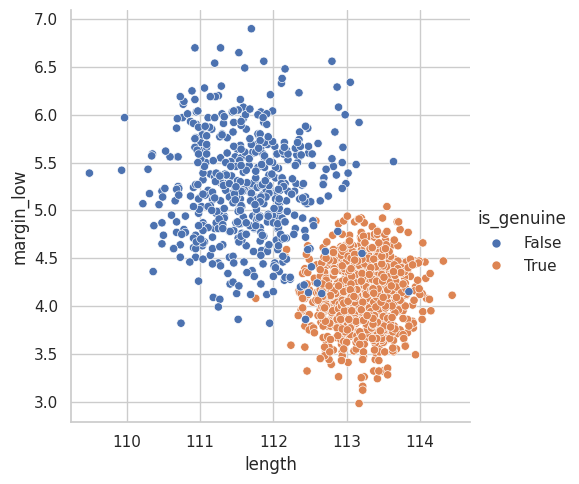

In [ ]:
#Création d'un graphique en nuage de point pour nos 2 variables : 'length' et 'margin_low'
x = billets['length']
y = billets['margin_low']
z = billets['is_genuine']
sns.relplot(x = x, y = y, hue= z)
#Affichage du graphique
plt.show()

Ce graphique montre la corrélation entre les variables 'margin_low' et 'length'. En bleu ce sont les faux billets et en orange ce sont les vrais billets.
On observe une nette distinction entre les vrais et les faux billets.

## ETAPE 5 : REGRESSION LOGISTIQUE

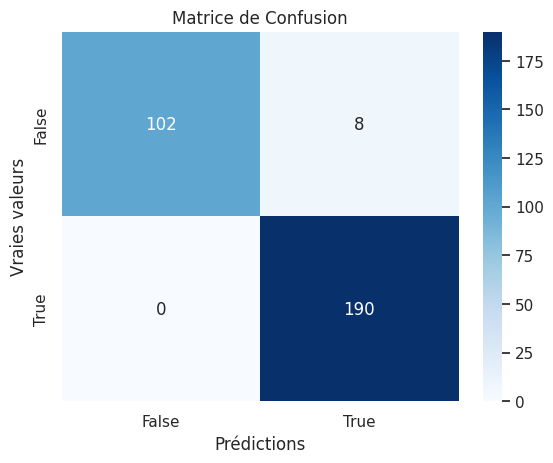

In [ ]:
# Supposons que 'is_genuine' est la colonne que vous souhaitez prédire
X = billets.drop(['is_genuine', 'margin_low'], axis=1)
y = billets['is_genuine']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle de régression logistique (à titre d'exemple)
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = model.predict(X_test)

# Créer une matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion avec seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['False', 'True'], yticklabels=['False', 'True'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies valeurs')
plt.title('Matrice de Confusion')
plt.show()


Cette matrice de confusion représente la proportion des vrais et faux positifs détecté par la régréssion logisitque.

On observe sur la matrice de confusion que la régréssion logisitque a détecté 101 faux négatifs c'est à dire de véritable faux billets. Puis il y a 190 vrais positifs et enfin 9 faux positifs c'est à dire des billets qui sont faux mais considerer comme étant des vrais billets par la régréssion logistique.

In [ ]:
#Division des données en ensembles d'entraînement et de test
X = billets.drop(['is_genuine', 'margin_low'], axis=1)
y = billets['is_genuine']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Création d'un modèle de régression logistique
model = LogisticRegression()

#Entraînement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

#Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

#Évaluation de la performance du modèle
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

#Affichage des résultats
print(f"Précision du modèle : {accuracy:.2f}")
print("\nMatrice de Confusion :")
print(conf_matrix)
print("\nRapport de Classification :")
print(classification_rep)


Précision du modèle : 0.97

Matrice de Confusion :
[[102   8]
 [  0 190]]

Rapport de Classification :
              precision    recall  f1-score   support

       False       1.00      0.93      0.96       110
        True       0.96      1.00      0.98       190

    accuracy                           0.97       300
   macro avg       0.98      0.96      0.97       300
weighted avg       0.97      0.97      0.97       300



L'accuracy indique la proportion de prédictions correctes par rapport au nombre total de prédictions


F1-Score résume les valeurs de précision et de recall en une seule mesure.

le Recall mesure la proportion des vrais positifs par rapport au total des cas réels positifs. Autrement dit, il indique la capacité du modèle à détecter tous les cas positifs. Un recall élevé signifie que le modèle est capable de détecter la majorité des cas positifs. Cependant, un recall trop élevé peut aussi indiquer un grand nombre de faux positifs.

La précision est la capacité du modèle de régression logistique à identifier correctement les vrais billets parmi l’ensemble des billets classés comme vrais.

Le support est le nombre total d’occurrences de la classe cible dans l’ensemble de données de test.

## ETAPE 6 : K-MEANS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


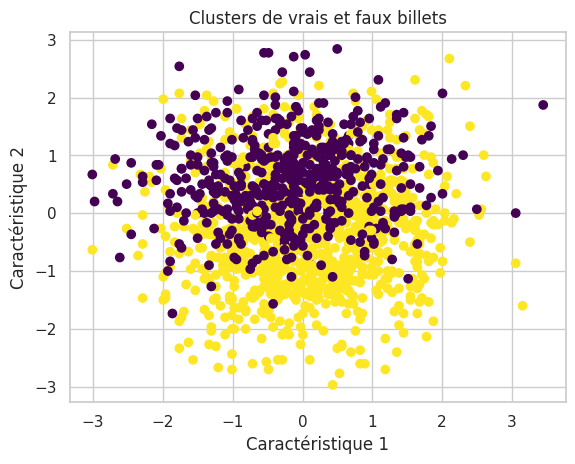

Précision du K-means : 96.13%


In [ ]:
#Sélection des caractéristiques pour le clustering (exclusion de 'is_genuine' et 'margin_low')
X = billets.drop(['is_genuine', 'margin_low'], axis=1)

#Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Utilisation du K-means avec 2 clusters (vrais et faux billets)
kmeans = KMeans(n_clusters=2, random_state=42)
billets['cluster'] = kmeans.fit_predict(X_scaled)

#Visualisation des clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=billets['cluster'], cmap='viridis')
plt.title('Clusters de vrais et faux billets')
plt.xlabel('Caractéristique 1')
plt.ylabel('Caractéristique 2')
plt.show()

#Comparaison
accuracy = sum(billets['is_genuine'] == billets['cluster']) / len(billets)
print(f"Précision du K-means : {accuracy:.2%}")


On constate que la précision du K-means est de 96 %, soit un point de moins que la régréssion linéaire.

On osberve aussi qu'il n'y a pas de séparation nette entre les vrais et faux billets.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


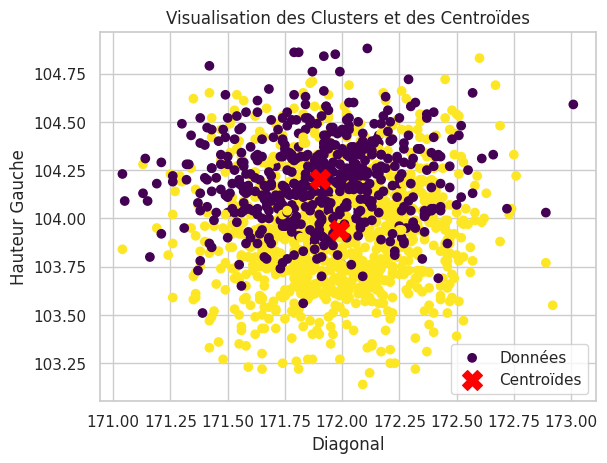

In [ ]:
#Calcul des centroïdes
kmeans = KMeans(n_clusters=2, random_state=42)
billets['cluster'] = kmeans.fit_predict(X_scaled)

#Réalisation des centroïdes
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

# Créer un graphique pour visualiser les clusters et les centroïdes
plt.scatter(billets['diagonal'], billets['height_left'], c=billets['cluster'], cmap='viridis', label='Données')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, c='red', label='Centroïdes')
plt.title('Visualisation des Clusters et des Centroïdes')
plt.xlabel('Diagonal')
plt.ylabel('Hauteur Gauche')
plt.legend()
#Affichage du graphique
plt.show()

D'après ce graphique, on oberve que les centroïdes sont très proches l'un de l'autre.

# ANALYSE EN COMPOSANTES PRINCIPALES

In [ ]:
#Suppression de la variable qualitative
billets_clean_df = billets.drop(['is_genuine'], axis=1)
#Fit des valeurs sur le modèle
std_scale = sk.preprocessing.StandardScaler().fit(billets_clean_df)
billets_std = pd.DataFrame(std_scale.transform(billets_clean_df), columns=billets_clean_df.columns) # Valeurs standardisées
billets_std

,diagonal,height_left,height_right,margin_low,margin_up,length,residuals,cluster
0,-0.49,2.77,3.16,0.06,-1.13,0.17,-0.52,-1.39
1,-1.63,-2.24,-0.80,-1.08,-0.70,0.47,-1.06,0.72
2,2.40,1.50,-1.29,-0.13,-0.91,0.55,2.26,0.72
3,-1.96,-0.40,0.06,-1.31,-0.61,0.95,-0.36,0.72
4,-0.75,0.84,-1.41,-0.67,1.42,-0.16,1.85,0.72
...,...,...,...,...,...,...,...,...
1495,-0.68,1.17,0.77,-0.10,-0.27,-1.60,0.26,-1.39
1496,0.76,2.01,1.60,1.19,0.94,-1.96,0.21,-1.39
1497,-0.52,-0.07,0.61,1.56,0.90,-0.84,-0.57,-1.39
1498,0.33,0.84,0.43,1.04,1.33,-0.49,0.29,-1.39


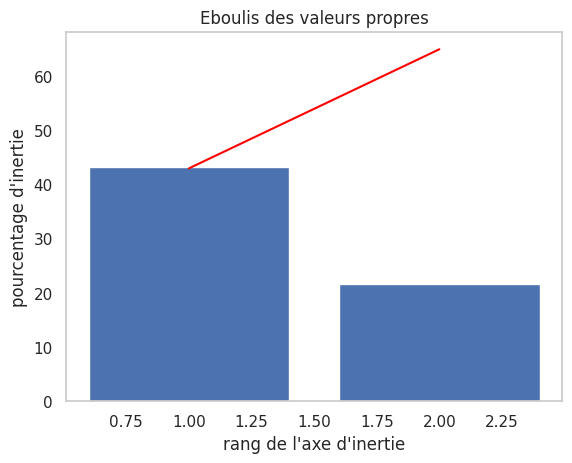

Variance expliquée : 64.9 %


In [ ]:
#Réalisation du PCA en 2 composantes
n_components = 2
pca = PCA(n_components=n_components)
pca.fit(billets_std)

#Réalisation du graphique

scree = (pca.explained_variance_ratio_*100).round(2)

scree_cum = scree.cumsum().round()

x_list = range(1, n_components+1)
plt.grid()
plt.bar(x_list, scree)

#Titre et légendes

plt.plot(x_list, scree_cum,c="red")
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")

#Affichage du graphique

plt.show(block=False)

#Variance expliquée

print('Variance expliquée :',round(sum(pca.explained_variance_ratio_) * 100, 1), '%')

On observe sur ce graphique en éboulis des valeurs propres que 2 dimensions suiffisent à expliquer 64 % de la variance des données.

In [ ]:
features = billets_std.columns

#Création du DataFrame des 2 premières composantes principales

pca = PCA(n_components=n_components)
billets_acp = pca.fit_transform(billets_std)
df_acp = pd.DataFrame(billets_acp)
df_acp.rename(columns = {0:'PC1',1:'PC2'}, inplace = True)
df_acp['is_genuine'] = billets['is_genuine'][:, np.newaxis]

#Affichage du dataframe
df_acp.head(5)

<ipython-input-293-69980f0f61c6>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df_acp['is_genuine'] = billets['is_genuine'][:, np.newaxis]


,PC1,PC2,is_genuine
0,2.11,-0.13,True
1,-1.91,-1.89,True
2,-1.52,2.97,True
3,-1.49,-0.75,True
4,-0.48,2.35,True


In [ ]:
#Création du Dataframe des centroides

df_centroide = df_acp.groupby('is_genuine').mean()
df_centroide = df_centroide.reset_index()
df_centroide['is_genuine'] = df_centroide['is_genuine'].replace([True, False], 'centroide')

#Concaténation des 2 DataFrame

df_acp = pd.concat([df_acp, df_centroide], ignore_index = True)
df_acp

,PC1,PC2,is_genuine
0,2.11,-0.13,True
1,-1.91,-1.89,True
2,-1.52,2.97,True
3,-1.49,-0.75,True
4,-0.48,2.35,True
...,...,...,...
1497,2.40,-0.49,False
1498,2.18,0.71,False
1499,1.52,0.85,False
1500,2.42,0.11,centroide


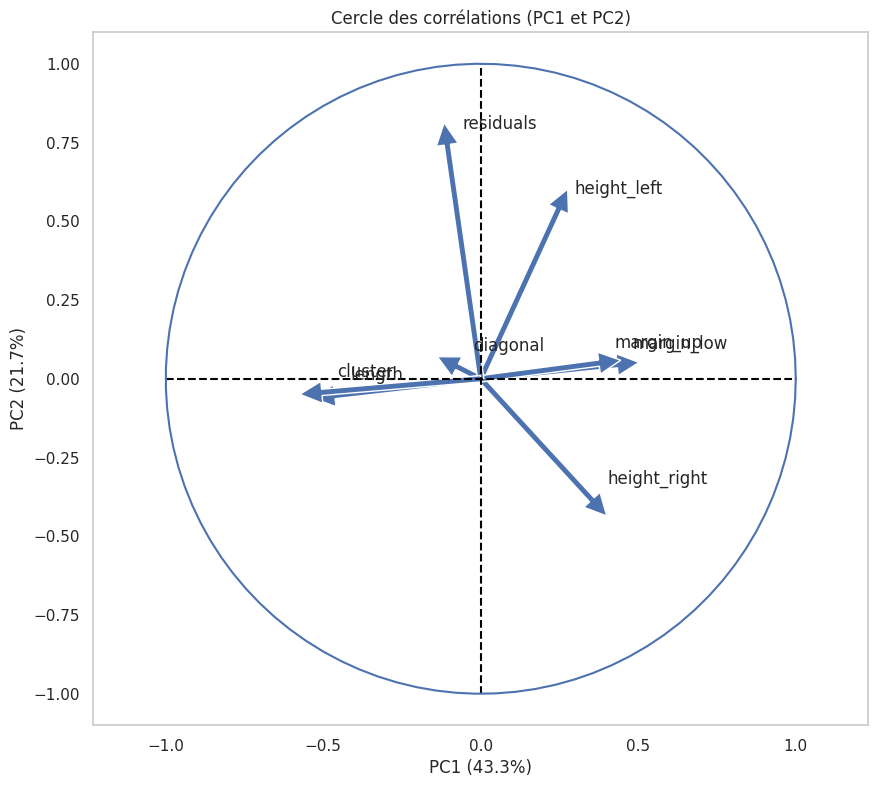

In [ ]:
#Extrait x et y
x_y = (0, 1)
x, y = x_y

#Création du plan
fig, ax = plt.subplots(figsize=(10, 9))

#Pour chaque composante :
for i in range(pca.components_.shape[1]):
    #Paramétrage des flèches
    ax.arrow(0, 0, pca.components_[x, i], pca.components_[y, i],
             head_width=0.07, head_length=0.07, width=0.02)

    #Paramétrage des labels
    plt.text(pca.components_[x, i] + 0.05, pca.components_[y, i] + 0.05, features[i])

#Affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='black', ls='--')
plt.plot([0, 0], [-1, 1], color='black', ls='--')

#Légendes
plt.xlabel(f'PC{x + 1} ({round(100 * pca.explained_variance_ratio_[x], 1)}%)')
plt.ylabel(f'PC{y + 1} ({round(100 * pca.explained_variance_ratio_[y], 1)}%)')

# itre
plt.title(f"Cercle des corrélations (PC{x + 1} et PC{y + 1})")

#Création du cercle
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Ajoute un cercle unitaire pour l'échelle

#Affichage du graphique
plt.grid()
plt.axis('equal')
plt.show()


Sur ce cercle des corrélations nous avons 6 flèches qui représentent nos 6 variables : length, height_left, height_right, margin_up, margin_low, et diagonal. Elles sont disposées dans un cercle ayant une abscisse : PC1 et une ordonnée : PC2.

Les 2 axes expliquent 64 % de la variance. Cette variance est fortement concentrée sur l'axe des abscisses PC1 qui concentre près de 50% de la variance. C'est donc sur cette axe que l'on va avoir le plus d'explication.

On constate que les variables qui contribuent le plus à chaque composante sont :
*   diagonal,
*   length,
*   et margin_low.

Liens entre les variables :
*   plus la diagonale est élevé et plus les autres dimensions des billets c'est à dire les autres variables augmentent,
*   length est corrélé négativement à margin_low c'est à dire que plus le billet est grand est plus margin_low sera faible,
*   dans l'ensemble plus length est grand et plus les autres variables seront petites.





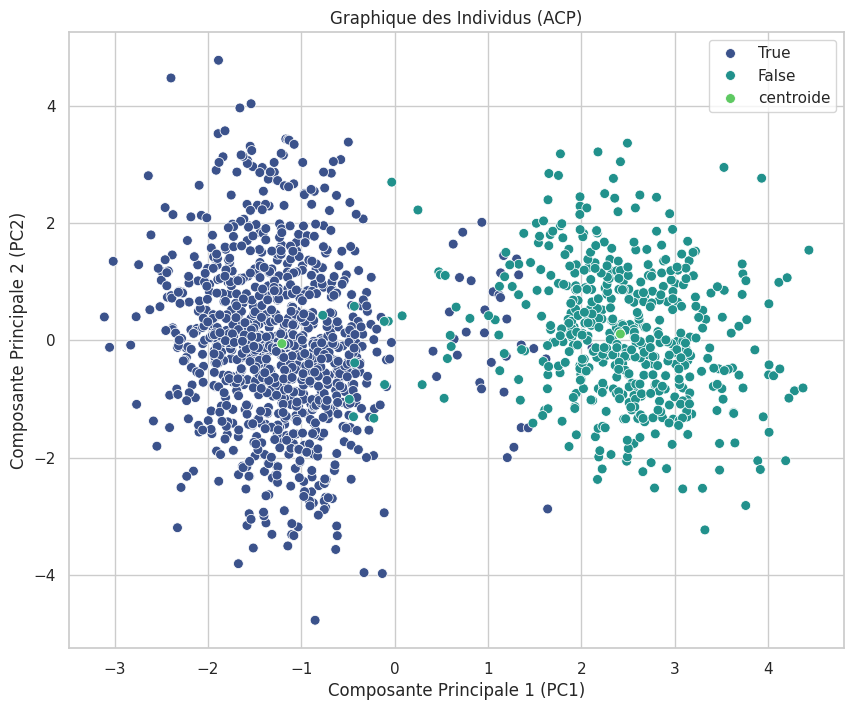

In [ ]:
#Création du graphique des individus
df_plot = pd.concat([df_acp, df_centroide], ignore_index=True)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='is_genuine', data=df_plot, palette='viridis', s=50)
#Titre, axes et légendes
plt.title('Graphique des Individus (ACP)')
plt.xlabel('Composante Principale 1 (PC1)')
plt.ylabel('Composante Principale 2 (PC2)')
#Affichage du graphique
plt.legend()
plt.show()

On observe à l'aide de ce graphique en nuage de point représentant l'ensemble des individus une séparation importante entre 2 clusters : les vrais et les faux billets. Il y a 2 centroïdes situés au centre de chaque cluster. De plus les 2 clusters ont l'air opposé l'un à l'autre car ils se situent l'un en face de l'autre.

## ETAPE 8 : CONCLUSION

Nous avons utiliser 3 méthodes différentes pour détecter les faux billets :
*   ACP,
*   Régréssion logistique,
*   et le K-means.

D'après les résultats obtenues, la régréssion logistique offre une précision supérieure aux autre méthodes : 97 %. Nous allons donc choisir cette méthode pour l'étape production.



## ETAPE 9 : PRODUCTION

Cette étape à pour but de recevoir les nouveaux datasets afin de détecter les vrais des faux billets.

In [ ]:
#Création du dataframe
billets_data = billets.drop('cluster', axis=1)

df_billets = pd.DataFrame(billets_data)

#Division du dataset en features (X) et target variable (y)
X = df_billets.drop("is_genuine", axis=1)
y = df_billets["is_genuine"]

#Entraînement du modèle de régression logistique
model = LogisticRegression()
model.fit(X, y)

#Fonction "detection_billets"
def detection_billets(df_productions):
    # Utilisation du modèle pour prédire si les billets sont vrais ou faux
    if 'residuals' not in df_billets_productions.columns:
      df_billets_productions['residuals'] = 0

    predictions = model.predict(df_productions.drop("id", axis=1))

    #Ajout des prédictions au dataframe
    df_productions["is_fake"] = predictions

    #List des faux billets détectés
    faux_billets = df_productions[df_productions["is_fake"] == False]

    return faux_billets

#Chargement du dataset "billets_productions"
billets_productions_data = pd.read_csv('/content/drive/MyDrive/Herbet_Thomas_P10/billets_production.csv')

df_billets_productions = pd.DataFrame(billets_productions_data)

#Utilisation de la fonction pour détecter les faux billets
faux_billets_detectes = detection_billets(df_billets_productions)

#Affichage des faux billets détectés
print("Faux billets détectés :")
print(faux_billets_detectes[["id", "diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]])


Faux billets détectés :
    id  diagonal  height_left  height_right  margin_low  margin_up  length
0  A_1    171.76       104.01        103.54        5.21       3.30  111.42
1  A_2    171.87       104.17        104.13        6.00       3.31  112.09
2  A_3    172.00       104.58        104.29        4.99       3.39  111.57


In [ ]:
#Fonction "identification_vrais_billets"
def identification_vrais_billets(df_productions):
    # Vérification et ajout de la colonne residuals
    if 'residuals' not in df_productions.columns:
        df_productions['residuals'] = 0

    # Utilisation du modèle pour prédire si les billets sont vrais ou faux
    features_used = ["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length", "residuals"]
    predictions = model.predict(df_productions[features_used])

    # Ajout des prédictions à la dataframe
    df_productions["is_genuine"] = predictions

    # Liste des vrais billets identifiés
    vrais_billets = df_productions[df_productions["is_genuine"] == True]

    return vrais_billets

# Vérification et ajout de la colonne residuals
if 'residuals' not in df_billets_productions.columns:
    df_billets_productions['residuals'] = 0

# Utilisation de la fonction pour identifier les vrais billets
vrais_billets_identifies = identification_vrais_billets(df_billets_productions)

# Affichage des vrais billets identifiés
print("Vrais billets identifiés :")
print(vrais_billets_identifies[["id", "diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]])


Vrais billets identifiés :
    id  diagonal  height_left  height_right  margin_low  margin_up  length
3  A_4    172.49       104.55        104.34        4.44       3.03  113.20
4  A_5    171.65       103.63        103.56        3.77       3.16  113.33
